## Motivation
Hi all, This is my first notebook. I am trying to perform a linear regression on personal health data set end to end. Any feedback and constuctive feedback is appreciated.

## Import Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Sampling the data

In [ ]:
# Read the data
data_df=pd.read_csv("insurance.csv")

# See sample data
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocessing the data

In [ ]:
# Check for the dtypes & nulls
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Just being doubly sure
data_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Getting some stats about the data
data_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Getting the numerical columns first
data_df.describe().columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
# Separating numerical and categorical data
df_num = data_df[['age','bmi','children','charges']]
df_cat = data_df[['sex','smoker','region']]

In [ ]:
# Converting the categorical data into numeric data.
# One hot enconding the categorical data
df1 = pd.get_dummies(df_cat)
df1

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [ ]:
# Concatenating the categorical and numerical data to form our data set.
data = pd.concat([df_num,df1], axis=1)
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## Exploratory Data Analysis

In [ ]:
# Finding out the correlation between the features
data.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


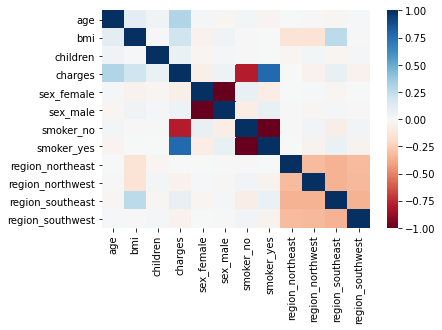

In [ ]:
# Heatmap to show correlation
sns.heatmap(data.corr(), cmap='RdBu')

From this we can see the following observations:

1. Strong correlation between charges and smoker_yes.
2. Weak correlation between charges and age.
2. Weak correlation between charges and bmi. 
3. Weak correlation between bmi and region_southeast.

Since the values for the weak correlations are less than 0.5 we can term them as insignificant and drop them

In [ ]:
# Correlation between charges and the other features.
data.corr()['charges'].sort_values()

smoker_no          -0.787251
sex_female         -0.057292
region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64

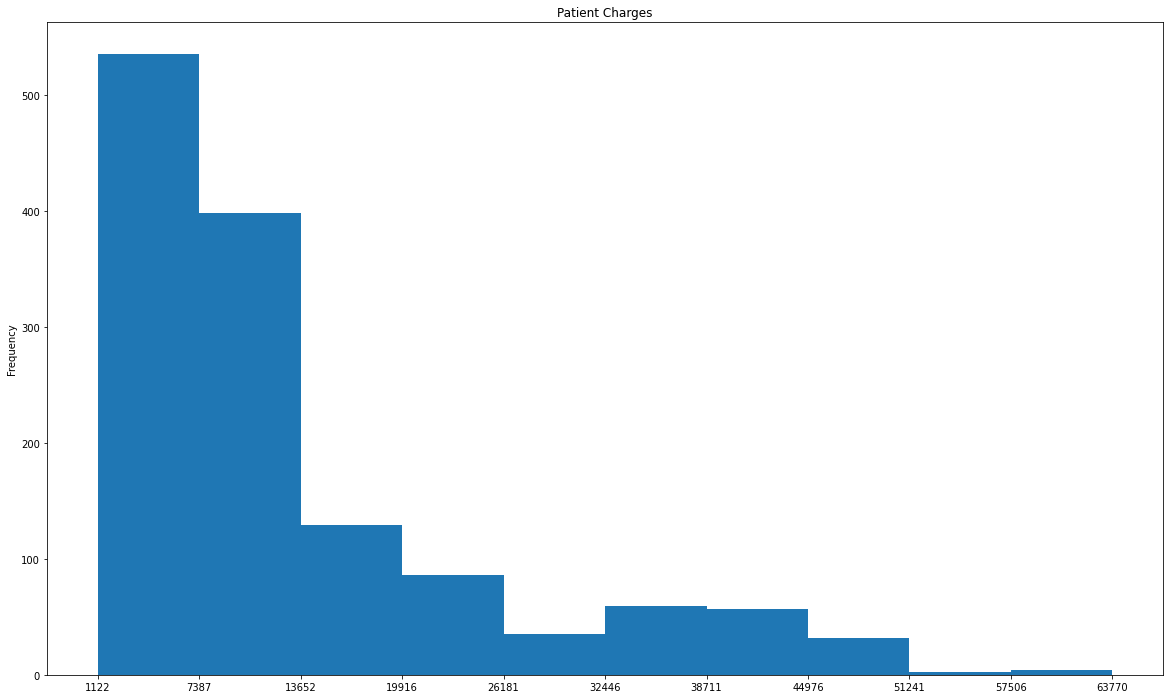

In [ ]:
# Graph showing the min and maximum charges
count, bin_edges = np.histogram(data['charges'])
data['charges'].plot(kind='hist', xticks=bin_edges, figsize=(20,12))
plt.title("Patient Charges")
plt.show()

## Model Building

We begin to predict the charges with the help of the other features.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Model fitting

In [ ]:
x = data.drop(['charges'], axis = 1)
y = data['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

### Model prediction

In [ ]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7909160991789904


our basic linear regression model predicting the cost of treatment looks good.

## Model Evaluation

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
print('MSE train data:' , mean_squared_error(y_train,y_train_pred))
print('MSE test data:' , mean_squared_error(y_test,y_test_pred))

print('R2 train data:', r2_score(y_train,y_train_pred))
print('R2 test data:' , r2_score(y_test,y_test_pred))

MSE train data: 37931360.958770044
MSE test data: 33342497.82695459
R2 train data: 0.7309569871174701
R2 test data: 0.7909160991789904


The closely matching results between training and test data means that our model is accurate.